In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\user\Downloads\2020_Yellow_Taxi_Trip_Data.csv')
# df

In [3]:
# let's consider the first 20,000 rows of the dataset
df_new = df.head(20000)
df_new

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.20,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.20,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.60,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.80,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.00,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2.0,01/01/2020 01:22:04 AM,01/01/2020 01:25:49 AM,1.0,0.38,1.0,N,230.0,163.0,1.0,4.5,0.5,0.5,1.66,0.0,0.3,9.96,2.5
19996,2.0,01/01/2020 01:28:21 AM,01/01/2020 01:50:14 AM,1.0,5.78,1.0,N,163.0,87.0,1.0,21.0,0.5,0.5,4.96,0.0,0.3,29.76,2.5
19997,2.0,01/01/2020 01:52:25 AM,01/01/2020 02:17:27 AM,1.0,6.00,1.0,N,87.0,80.0,1.0,22.0,0.5,0.5,7.74,0.0,0.3,33.54,2.5
19998,2.0,01/01/2020 01:01:17 AM,01/01/2020 01:34:39 AM,1.0,14.10,1.0,N,263.0,26.0,2.0,41.5,0.5,0.5,0.00,0.0,0.3,45.30,2.5


In [ ]:
# try to perform regression analysys and time - series analysis 

In [4]:
# finding out the duration : dropoff - pickup time

# let's check the data type first
df.dtypes

VendorID                  object
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID             float64
DOLocationID             float64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                   object
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [6]:
df_new.tpep_pickup_datetime = pd.to_datetime(df_new.tpep_pickup_datetime)
df_new.tpep_dropoff_datetime = pd.to_datetime(df_new.tpep_dropoff_datetime)
df_new.dtypes

VendorID                         object
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                    float64
DOLocationID                    float64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                          object
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [10]:
df_new['duration'] = df_new.tpep_dropoff_datetime - df_new.tpep_pickup_datetime
df_new['duration'] = df_new['duration'].dt.total_seconds()/60         # converting the data into minutes 

In [11]:
df_new['duration']

0           4.800000
1           7.416667
2           6.183333
3           4.850000
4           2.300000
            ...     
19995       3.750000
19996      21.883333
19997      25.033333
19998      33.366667
19999    1419.466667
Name: duration, Length: 20000, dtype: float64

In [12]:
df_new

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2.0,2020-01-01 01:22:04,2020-01-01 01:25:49,1.0,0.38,1.0,N,230.0,163.0,1.0,4.5,0.5,0.5,1.66,0.0,0.3,9.96,2.5,3.750000
19996,2.0,2020-01-01 01:28:21,2020-01-01 01:50:14,1.0,5.78,1.0,N,163.0,87.0,1.0,21.0,0.5,0.5,4.96,0.0,0.3,29.76,2.5,21.883333
19997,2.0,2020-01-01 01:52:25,2020-01-01 02:17:27,1.0,6.00,1.0,N,87.0,80.0,1.0,22.0,0.5,0.5,7.74,0.0,0.3,33.54,2.5,25.033333
19998,2.0,2020-01-01 01:01:17,2020-01-01 01:34:39,1.0,14.10,1.0,N,263.0,26.0,2.0,41.5,0.5,0.5,0.00,0.0,0.3,45.30,2.5,33.366667


In [13]:
# remove unwanted columns

df = df_new[['passenger_count','payment_type','fare_amount','trip_distance','duration']]


In [14]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
19995,1.0,1.0,4.5,0.38,3.750000
19996,1.0,1.0,21.0,5.78,21.883333
19997,1.0,1.0,22.0,6.00,25.033333
19998,1.0,2.0,41.5,14.10,33.366667


In [18]:
# checking for missing values
df.isnull().sum()
# if the missing values are very less, then we simply drop the values, otherwise we try to fill the values with mean/median
print("amout of missing value: ")
(5/20000)*100

amout of missing value: 


0.025

In [20]:
# drop the missing rows
df.dropna(inplace=True)
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
19995,1.0,1.0,4.5,0.38,3.750000
19996,1.0,1.0,21.0,5.78,21.883333
19997,1.0,1.0,22.0,6.00,25.033333
19998,1.0,2.0,41.5,14.10,33.366667


In [21]:
# now one observation is : payment type and passenger count can't be in float value, so let's change the values
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
19995,1,1,4.5,0.38,3.750000
19996,1,1,21.0,5.78,21.883333
19997,1,1,22.0,6.00,25.033333
19998,1,2,41.5,14.10,33.366667


In [22]:
# now let's also check for duplicate values
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2064,1,2,7.0,0.00,0.000000
2451,1,1,52.0,0.00,0.200000
2456,2,1,9.5,1.70,13.066667
2476,1,1,4.0,0.40,3.083333
3358,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
19427,1,1,7.5,1.40,8.066667
19692,1,2,4.5,0.50,3.800000
19841,1,1,5.5,0.70,5.383333
19883,1,1,6.5,1.30,6.616667


In [23]:
# here we can see, many rows are duplicate, so we will drop them as they don't contribute anything in our data analysis
df.drop_duplicates(inplace = True)

In [24]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
19995,1,1,4.5,0.38,3.750000
19996,1,1,21.0,5.78,21.883333
19997,1,1,22.0,6.00,25.033333
19998,1,2,41.5,14.10,33.366667


In [25]:
# one by one we will check each variables(columns) to perform EDA more effectively
# we will check the distribution / contribution of the data one by one
df['passenger_count'].value_counts(normalize = True) # as passenger count is categorical variable

passenger_count
1    0.587823
2    0.234514
3    0.061844
4    0.039245
5    0.038943
6    0.022347
0    0.015285
Name: proportion, dtype: float64

In [26]:
# let's check for payment type also
df['payment_type'].value_counts(normalize = True)

payment_type
1    0.686188
2    0.304278
3    0.005700
4    0.003834
Name: proportion, dtype: float64

In [27]:
# we will only consider 1 & 2 in payment type
# use pandas selection statement
df = df[df['payment_type'] < 3]
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
19995,1,1,4.5,0.38,3.750000
19996,1,1,21.0,5.78,21.883333
19997,1,1,22.0,6.00,25.033333
19998,1,2,41.5,14.10,33.366667


In [28]:
df['payment_type'].value_counts(normalize = True)


payment_type
1    0.692793
2    0.307207
Name: proportion, dtype: float64

In [29]:
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6)]


In [30]:
df['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.610150
2    0.243954
3    0.064455
5    0.040800
4    0.040641
Name: proportion, dtype: float64

In [31]:
df


,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
19995,1,1,4.5,0.38,3.750000
19996,1,1,21.0,5.78,21.883333
19997,1,1,22.0,6.00,25.033333
19998,1,2,41.5,14.10,33.366667


In [32]:
# now replace payment type 1 and 2 with card and cash
df['payment_type'].replace([1,2],['Card', 'Cash'],inplace=True)

In [33]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
4,1,Cash,3.5,0.00,2.300000
...,...,...,...,...,...
19995,1,Card,4.5,0.38,3.750000
19996,1,Card,21.0,5.78,21.883333
19997,1,Card,22.0,6.00,25.033333
19998,1,Cash,41.5,14.10,33.366667


In [34]:
# now we have filtered out categorical data, for numerical data we have describe
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,18897.000000,18897.000000,18897.000000,18897.000000
mean,1.657988,12.838022,2.813008,18.193489
std,1.042812,9.801687,2.791762,75.677209
min,1.000000,-52.000000,0.000000,0.000000
25%,1.000000,7.000000,1.100000,6.916667
50%,1.000000,10.000000,1.950000,12.000000
75%,2.000000,16.000000,3.560000,19.366667
max,5.000000,300.000000,39.630000,1439.000000


In [36]:
# in the above descriptive stats, we can ignore passenger count it has been shown because it's integer. 
# second observation is : fare_amount can't be negative, duration distance can't be zero
df = df[df['duration'] > 0]
df = df[df['trip_distance'] > 0]
df = df[df['fare_amount'] > 0]

In [37]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
19995,1,Card,4.5,0.38,3.750000
19996,1,Card,21.0,5.78,21.883333
19997,1,Card,22.0,6.00,25.033333
19998,1,Cash,41.5,14.10,33.366667


(array([1.766e+04, 8.830e+02, 1.290e+02, 1.300e+01, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  2.5 ,  27.25,  52.  ,  76.75, 101.5 , 126.25, 151.  , 175.75,
        200.5 , 225.25, 250.  ]),
 <BarContainer object of 10 artists>)

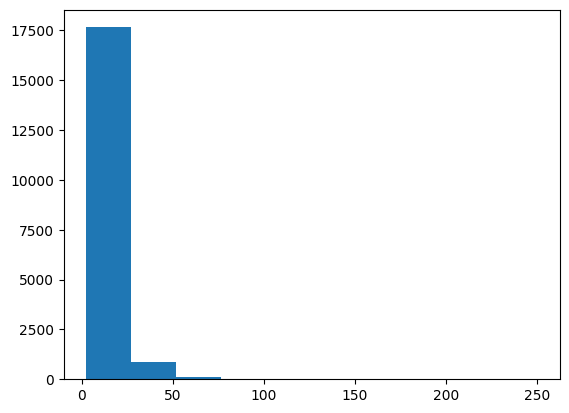

In [39]:
# let's check for outliers using histogram - if values are present that don't contribute in the dataset much we call it outliers
plt.hist(df['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20f4687aad0>,
 'caps': [<matplotlib.lines.Line2D at 0x20f46884810>,
 'boxes': [<matplotlib.lines.Line2D at 0x20f46798490>],
 'medians': [<matplotlib.lines.Line2D at 0x20f46885a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x20f46886350>],
 'means': []}

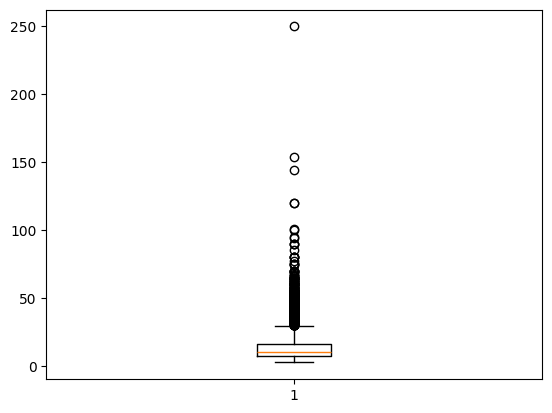

In [40]:
# since values are till 250 that are not even properly vissible then we have to do something
# let's also plot box plot 
plt.boxplot(df['fare_amount'])

In [42]:
# to remove outliers we have to methods - zscore, interquartile range

for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1

    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR

    #now filter the data : data > lower_bound && data < upper_bound
    df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
19992,4,Card,21.5,4.10,30.350000
19993,1,Cash,7.5,1.16,7.800000
19995,1,Card,4.5,0.38,3.750000
19996,1,Card,21.0,5.78,21.883333


{'whiskers': [<matplotlib.lines.Line2D at 0x20f46966190>,
 'caps': [<matplotlib.lines.Line2D at 0x20f46967550>,
 'boxes': [<matplotlib.lines.Line2D at 0x20f469657d0>],
 'medians': [<matplotlib.lines.Line2D at 0x20f46970410>],
 'fliers': [<matplotlib.lines.Line2D at 0x20f46970c90>],
 'means': []}

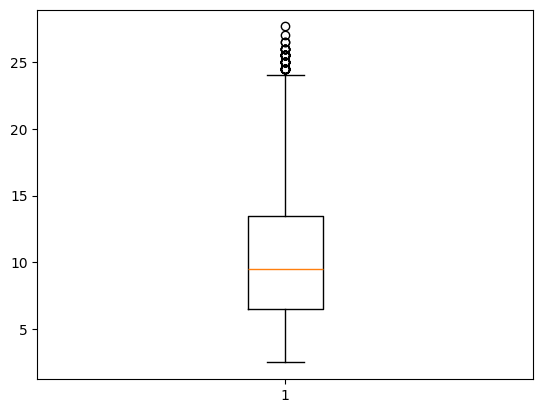

In [47]:
plt.boxplot(df['fare_amount']) # we can see, outliers have been removed

# data visualization & data driven dicision
Now we will start the data visualization part : we will see, whether based on the fare amount and trip distance customer prefers to pay using card or cash

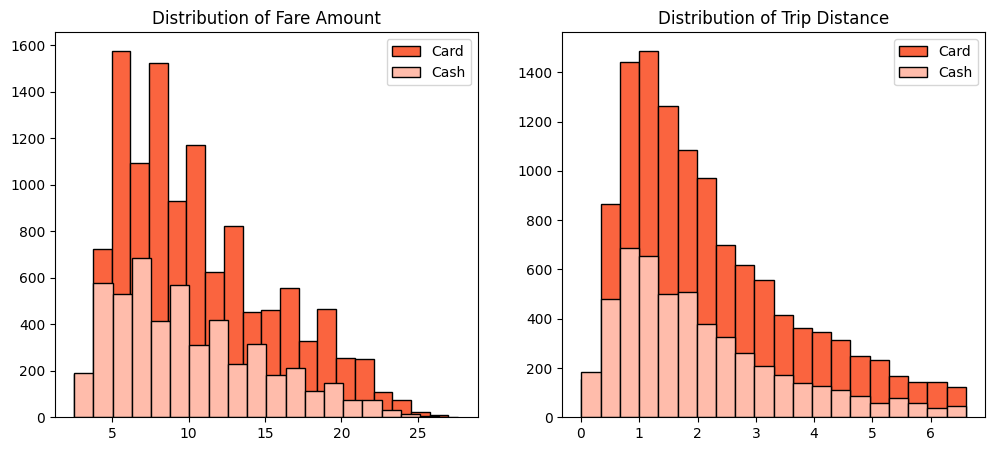

In [61]:
# simply plotting graph is not presentable, we need to make it attractive and proper visualization must be made 
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(df[df['payment_type'] == 'Card']['fare_amount'], histtype='barstacked', bins = 20, edgecolor = 'k', color='#FA643F', label='Card')
plt.hist(df[df['payment_type'] == 'Cash']['fare_amount'], histtype='barstacked', bins = 20, edgecolor = 'k', color='#FFBCAB', label='Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of Trip Distance')
plt.hist(df[df['payment_type'] == 'Card']['trip_distance'], histtype='barstacked', bins = 20, edgecolor = 'k', color='#FA643F', label='Card')
plt.hist(df[df['payment_type'] == 'Cash']['trip_distance'], histtype='barstacked', bins = 20, edgecolor = 'k', color='#FFBCAB', label='Cash')
plt.legend()


plt.show()

In [62]:
df.groupby('payment_type').agg({'fare_amount': ['mean', 'std'], 'trip_distance': ['mean', 'std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card            10.63071  4.980790      2.229763  1.468270
Cash            10.14851  4.857288      2.039134  1.425377

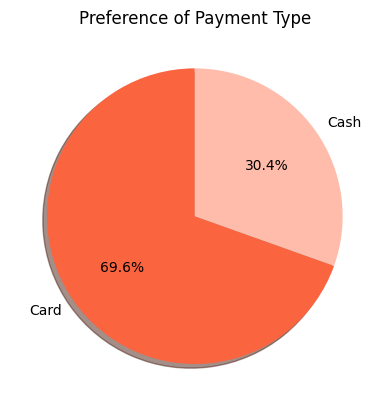

In [72]:
# let's also check distribution of data based on percentage : whenever we have to plot based on percentage we can use pie chart
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize=True), labels=df['payment_type'].value_counts().index, startangle=90, shadow=True, autopct='%1.1f%%', colors=['#FA643F', '#FFBCAB'] )
plt.show()

In [74]:
# passenger count analysis
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'}, inplace = True)
passenger_count.reset_index(inplace=True)

In [75]:
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

In [76]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,7058,42.180123
1,Card,2,2933,17.528238
2,Card,3,737,4.404470
3,Card,4,438,2.617582
4,Card,5,472,2.820773
5,Cash,1,3130,18.705552
6,Cash,2,1175,7.022052
7,Cash,3,348,2.079723
8,Cash,4,243,1.452220
9,Cash,5,199,1.189267


In [81]:
# let's create a custom dataframe for better visualization

df = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df['payment_type'] = ['Card', 'Cash']
df.iloc[0, 1:] = passenger_count.iloc[0:5, -1]
df.iloc[1, 1:] = passenger_count.iloc[5:, -1]
df

,payment_type,1,2,3,4,5
0,Card,42.180123,17.528238,4.40447,2.617582,2.820773
1,Cash,18.705552,7.022052,2.079723,1.45222,1.189267


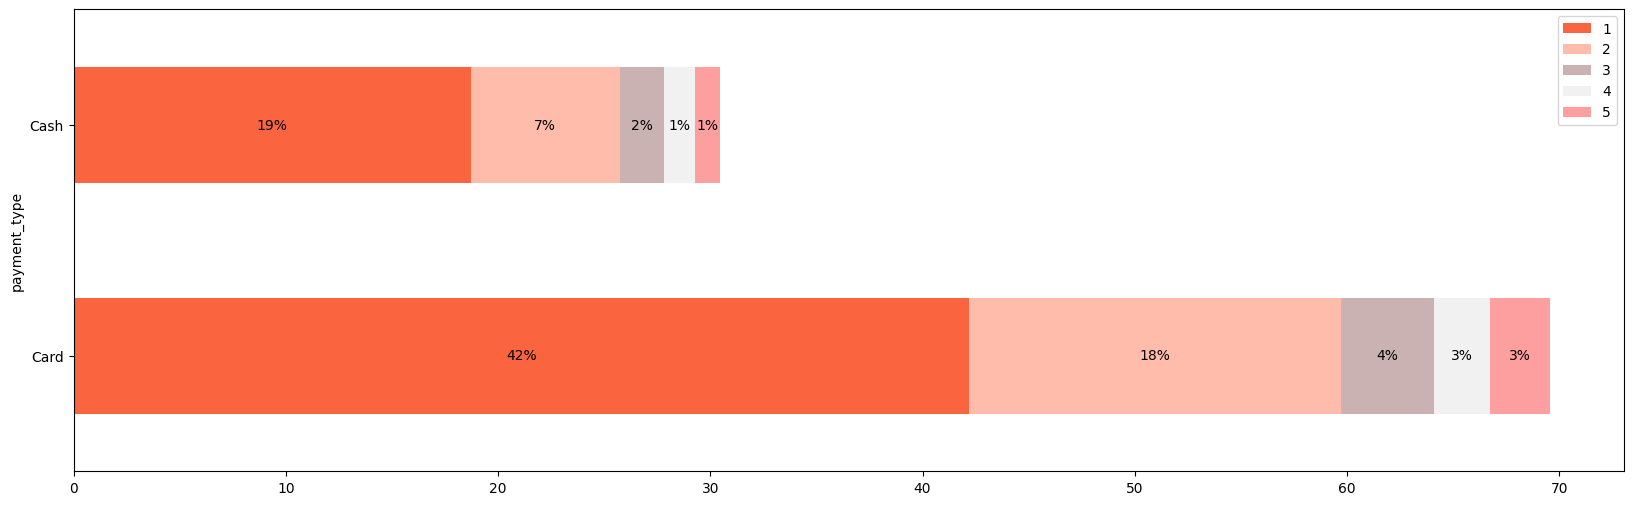

In [90]:
# plot a stacked bar chart

fig, ax = plt.subplots(figsize=(20, 6))
df.plot(x='payment_type', kind='barh', stacked=True, color=['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'], ax=ax)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2,
            y + height/2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')
            
plt.show()

# now whatever we have done, we will do hypothesis testing to prove it 